In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm
import functions 

import cmcrameri.cm as cmc  # this includes berlin


In [2]:
def prepare_for_plot(dfcount, column, landcover, new_name):
    if column =='count':
        melted = pd.melt(dfcount, id_vars=['D', 'D_year', 'D_month'], var_name='elevation', value_name=new_name) 
        melted = melted.rename(columns={'D_year': 'year', 'D_month': 'month'})
    if column == 'volume':
        melted = pd.melt(dfcount, id_vars=['year', 'month'], var_name='elevation', value_name=new_name)
    
    melted['elevation'] = melted['elevation'].astype(str).str.extract(r'^(\d+)')[0].astype(int)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    # melted = melted.sort_values('elevation_bin')
    melted['date_id'] = melted['year'].astype(str) + "_" + melted['month'].astype(str) + "_" + melted['elevation'].astype(str)
    melted = melted.sort_values('date_id')
    melted['landcover'] = landcover
    return melted 


def count_mean_per_month(df):
    dfcount_mean = df.groupby('month')['dfcount'].mean().reset_index()
    dfcount_mean = dfcount_mean.rename(columns={'dfcount': 'dfcount_month_mean'})
    
    df = df.merge(dfcount_mean, on='month', how='left')
    return(df)




# TL FOR ALL LAND COVERS AND BOTH LOCATIONS

In [3]:
# LANGTANG

output_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/TL/'

# ------ Qstl - volume of sediments 

TL1 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL2 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_2landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL3 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_3landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL4 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_4landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL5 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_5landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)


TL1 = prepare_for_plot(TL1, 'volume', 'landcover 1', 'Qstl')#[['Q100', 'date_id']]
TL2 = prepare_for_plot(TL2, 'volume', 'landcover 2', 'Qstl')#[['Q100', 'date_id']]
TL3 = prepare_for_plot(TL3, 'volume', 'landcover 3', 'Qstl')#[['Q100', 'date_id']]
TL4 = prepare_for_plot(TL4, 'volume', 'landcover 4', 'Qstl')#[['Q100', 'date_id']]
TL5 = prepare_for_plot(TL5, 'volume', 'landcover 5', 'Qstl')#[['Q100', 'date_id']]


# ------ dfcount - total count of sediments per month

# dfspot

dfspot_path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025May_output/dfspot/'

TL1count = pd.read_csv(dfspot_path + f'langtang_monthly_dfspot_count_landcover1.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL2count = pd.read_csv(dfspot_path + f'langtang_monthly_dfspot_count_landcover2.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL3count = pd.read_csv(dfspot_path + f'langtang_monthly_dfspot_count_landcover3.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL4count = pd.read_csv(dfspot_path + f'langtang_monthly_dfspot_count_landcover4.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL5count = pd.read_csv(dfspot_path + f'langtang_monthly_dfspot_count_landcover5.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)


TL1count = prepare_for_plot(TL1count, 'count', 'landcover 1', 'dfcount')[['dfcount', 'date_id']]
TL2count = prepare_for_plot(TL2count, 'count', 'landcover 2', 'dfcount')[['dfcount', 'date_id']]
TL3count = prepare_for_plot(TL3count, 'count', 'landcover 3', 'dfcount')[['dfcount', 'date_id']]
TL4count = prepare_for_plot(TL4count, 'count', 'landcover 4', 'dfcount')[['dfcount', 'date_id']]
TL5count = prepare_for_plot(TL5count, 'count', 'landcover 5', 'dfcount')[['dfcount', 'date_id']]



TL1 = TL1.merge(TL1count, on = 'date_id')
TL2 = TL2.merge(TL2count, on = 'date_id')
TL3 = TL3.merge(TL3count, on = 'date_id')
TL4 = TL4.merge(TL4count, on = 'date_id')
TL5 = TL5.merge(TL5count, on = 'date_id')




TL1 = count_mean_per_month(TL1)
TL2 = count_mean_per_month(TL2)
TL3 = count_mean_per_month(TL3)
TL4 = count_mean_per_month(TL4)
TL5 = count_mean_per_month(TL5)

In [4]:
#  MUSTANG

output_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/TL/'

# ------ Qstl - volume of sediments 

TL1m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL2m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_2landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL3m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_3landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL4m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_4landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL5m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_5landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)


TL1m = prepare_for_plot(TL1m, 'volume', 'landcover 1', 'Qstl')
TL2m = prepare_for_plot(TL2m, 'volume', 'landcover 2', 'Qstl')
TL3m = prepare_for_plot(TL3m, 'volume', 'landcover 3', 'Qstl')
TL4m = prepare_for_plot(TL4m, 'volume', 'landcover 4', 'Qstl')
TL5m = prepare_for_plot(TL5m, 'volume', 'landcover 5', 'Qstl')



# ------ dfcount - total count of sediments per month



TL1countm = pd.read_csv(dfspot_path + f'mustang_monthly_dfspot_count_landcover1.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL2countm = pd.read_csv(dfspot_path + f'mustang_monthly_dfspot_count_landcover2.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL3countm = pd.read_csv(dfspot_path + f'mustang_monthly_dfspot_count_landcover3.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL4countm = pd.read_csv(dfspot_path + f'mustang_monthly_dfspot_count_landcover4.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL5countm = pd.read_csv(dfspot_path + f'mustang_monthly_dfspot_count_landcover5.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)


TL1countm = prepare_for_plot(TL1countm, 'count', 'landcover 1', 'dfcount')[['dfcount', 'date_id']]
TL2countm = prepare_for_plot(TL2countm, 'count', 'landcover 2', 'dfcount')[['dfcount', 'date_id']]
TL3countm = prepare_for_plot(TL3countm, 'count', 'landcover 3', 'dfcount')[['dfcount', 'date_id']]
TL4countm = prepare_for_plot(TL4countm, 'count', 'landcover 4', 'dfcount')[['dfcount', 'date_id']]
TL5countm = prepare_for_plot(TL5countm, 'count', 'landcover 5', 'dfcount')[['dfcount', 'date_id']]



TL1m = TL1m.merge(TL1countm, on = 'date_id')
TL2m = TL2m.merge(TL2countm, on = 'date_id')
TL3m = TL3m.merge(TL3countm, on = 'date_id')
TL4m = TL4m.merge(TL4countm, on = 'date_id')
TL5m = TL5m.merge(TL5countm, on = 'date_id')




TL1m = count_mean_per_month(TL1m)
TL2m = count_mean_per_month(TL2m)
TL3m = count_mean_per_month(TL3m)
TL4m = count_mean_per_month(TL4m)
TL5m = count_mean_per_month(TL5m)

# PREPARE FOR PLOTS 

In [5]:
from functools import reduce

def group_data(data, landcover_idx, variable):
    grouped = (
        data.groupby(['month', 'elevation_bin'])[variable]
        .mean()
        .reset_index()
    )
    # Rename the 'Qstl' column to include the landcover index
    grouped = grouped.rename(columns={f'{variable}': f'Qstl{landcover_idx}'})
    return grouped

In [6]:
# ------------------------------------------
# -------------- LANGTANG QSTL
# ------------------------------------------

dataframes = [TL1, TL2, TL3, TL4, TL5]
grouped_dfs = []

for idx, df in enumerate(dataframes, start=1):
    grouped = group_data(df, landcover_idx=idx, variable = 'Qstl')
    grouped_dfs.append(grouped)

# Combine all grouped_dfs into one by merging on 'month' and 'elevation_bin'
combined_df = reduce(
    lambda left, right: pd.merge(left, right, on=['month', 'elevation_bin'], how='outer'),
    grouped_dfs
)

# LANGTANG COUNT

grouped_dfs = []

for idx, df in enumerate(dataframes, start=1):
    grouped = group_data(df, landcover_idx=idx, variable = 'dfcount')
    grouped_dfs.append(grouped)

# Combine all grouped_dfs into one by merging on 'month' and 'elevation_bin'
combined_df_count = reduce(
    lambda left, right: pd.merge(left, right, on=['month', 'elevation_bin'], how='outer'),
    grouped_dfs
)

    
# ------------------------------------------
# -------------- MUSTANG QSTL
# ------------------------------------------

dataframes = [TL1m, TL2m, TL3m, TL4m, TL5m]
grouped_dfs = []

for idx, df in enumerate(dataframes, start=1):
    grouped = group_data(df, landcover_idx=idx, variable = 'Qstl')
    grouped_dfs.append(grouped)

# Combine all grouped_dfs into one by merging on 'month' and 'elevation_bin'
combined_dfm = reduce(
    lambda left, right: pd.merge(left, right, on=['month', 'elevation_bin'], how='outer'),
    grouped_dfs
)

# MUSTANG COUNT

grouped_dfs = []

for idx, df in enumerate(dataframes, start=1):
    grouped = group_data(df, landcover_idx=idx, variable = 'dfcount')
    grouped_dfs.append(grouped)

# Combine all grouped_dfs into one by merging on 'month' and 'elevation_bin'
combined_dfm_count = reduce(
    lambda left, right: pd.merge(left, right, on=['month', 'elevation_bin'], how='outer'),
    grouped_dfs
)



In [7]:
# combined_dfm_count

# PLOTS - LANGTANG

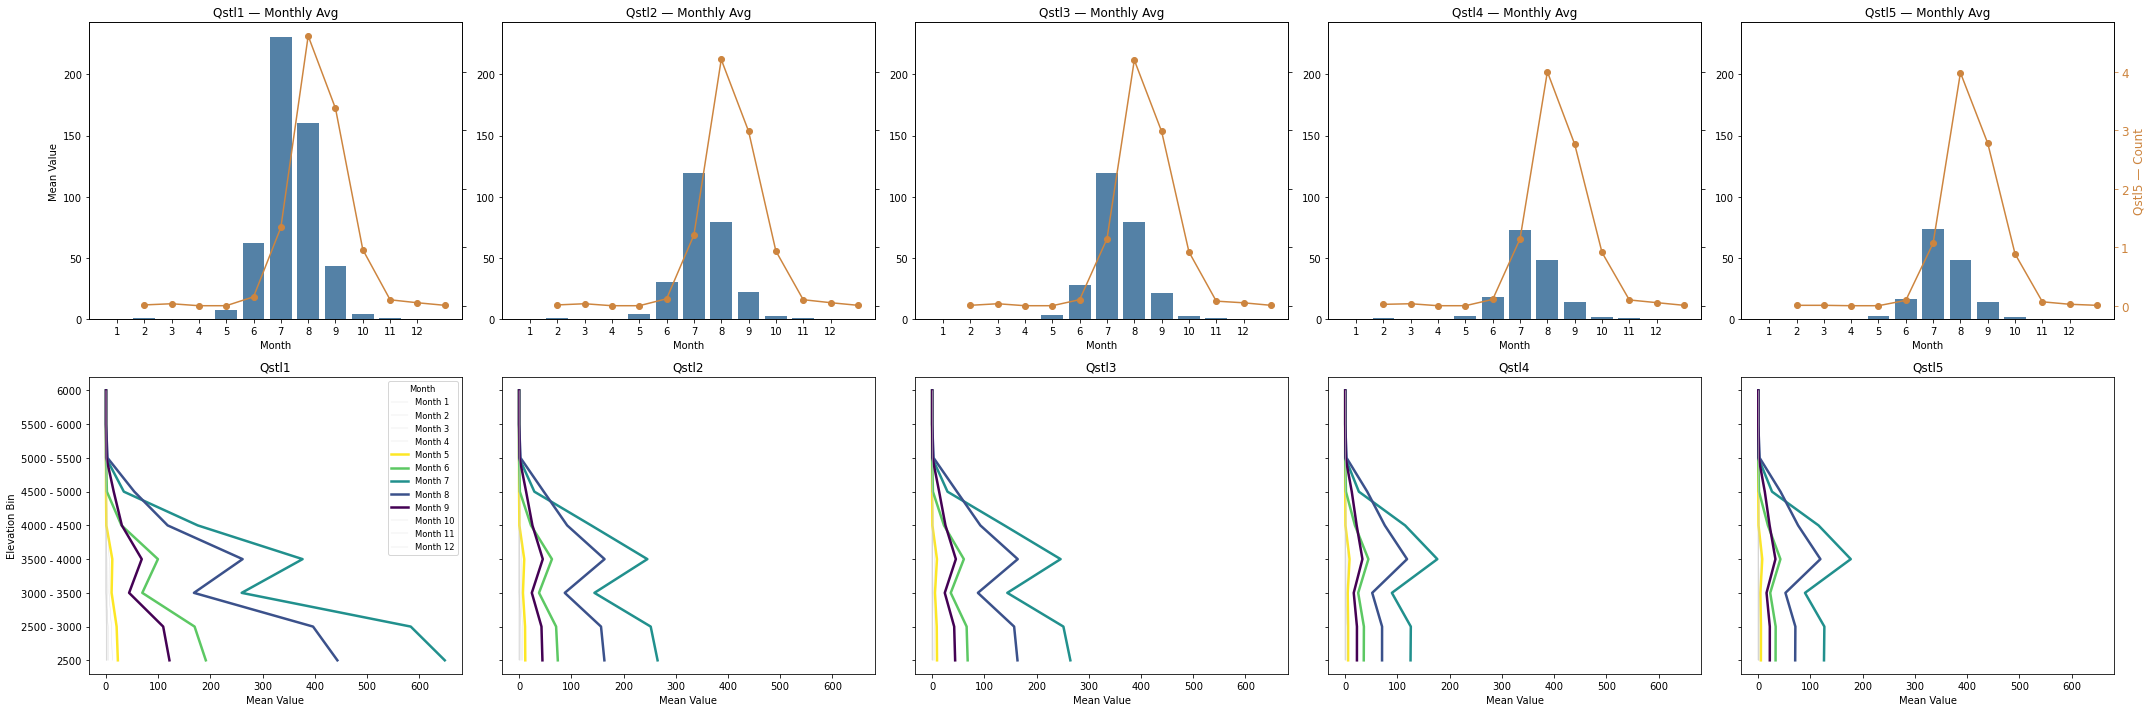

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

# FOR ELEVATION: Melt the combined_df
mean_df = combined_df.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')


mean_df_count = combined_df_count.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')

# Unique values
variables = mean_df['variable'].unique()
months = sorted(mean_df['month'].unique())
num_vars = len(variables)
# count
variables_count = mean_df_count['variable'].unique()



# # Color map for line plots
# cmap = cm.get_cmap('viridis_r', len(months))
# colors = [cmap(i) for i in range(len(months))]



# Define which months to highlight (colorbar stretched over these)
highlight_months = [5, 6, 7, 8, 9]
cmap = cm.get_cmap('viridis_r', len(highlight_months))

# Assign colors: vivid for 5–9, light gray for others
colors = {}
for month in months:
    if month in highlight_months:
        idx = highlight_months.index(month)
        colors[month] = cmap(idx)
    else:
        colors[month] = (0.8, 0.8, 0.8, 0.9)  # light gray with transparency



# ---------------- PLOT ----------------

fig = plt.figure(figsize=(6*num_vars, 10))

bar_axes = []
bar_sec_axes = []
line_axes = []

for i in range(num_vars):
    # Bar plot axes (top row), share y-axis
    sharey_bar = bar_axes[0] if i > 0 else None
    ax_bar = fig.add_subplot(2, num_vars, i + 1, sharey=sharey_bar)
    bar_axes.append(ax_bar)
    
    # Add secondary y-axis
    ax_bar_sec = ax_bar.twinx()
    bar_sec_axes.append(ax_bar_sec)

    # Line plot axes (bottom row), share x-axis
    sharex_line = line_axes[0] if i > 0 else None
    ax_line = fig.add_subplot(2, num_vars, num_vars + i + 1, sharex=sharex_line)
    line_axes.append(ax_line)

# --- Top row: bar plots ---
for i, var in enumerate(variables):
    ax = bar_axes[i]
    ax_sec = bar_sec_axes[i]
    
    df_var = mean_df[mean_df['variable'] == var]
    df_monthly = df_var.groupby('month')['value'].mean().reset_index()

    sns.barplot(
        data=df_monthly,
        x='month',
        y='value',
        color='steelblue',
        ax=ax
    )

    ax.set_title(f'{var} — Monthly Avg')
    ax.set_xlabel('Month')
    if i == 0:
        ax.set_ylabel('Mean Value')
    else:
        ax.set_ylabel('')







# ---------- ADD DF COUNT HERE ------------
    df_var_count = mean_df_count[mean_df_count['variable'] == var]
    df_monthly_count = df_var_count.groupby('month')['value'].mean().reset_index()
    
    # ax_sec.plot(df_monthly_count['month'], df_monthly_count, color='red', marker='o')
    ax_sec.plot(df_monthly_count['month'], df_monthly_count['value'], color='peru', marker='o')

    # ax_sec.set_ylabel('Cumulative Sum', color='red')
    # ax_sec.tick_params(axis='y', colors='peru')
    if i == num_vars - 1:
        ax_sec.set_ylabel(f'{var} — Count', color='peru', fontsize=12)
        ax_sec.tick_params(axis='y', colors='peru', labelsize=12, labelright=True)
    else:
        ax_sec.set_ylabel('')
        ax_sec.tick_params(axis='y', labelleft=False, labelright=False)


   # Get global y-limits from all secondary axes
    sec_ymins = [ax.get_ylim()[0] for ax in bar_sec_axes]
    sec_ymaxs = [ax.get_ylim()[1] for ax in bar_sec_axes]

    global_ymin = min(sec_ymins)
    global_ymax = max(sec_ymaxs)

    # Apply shared limits to all secondary axes
    for ax in bar_sec_axes:
        ax.set_ylim(global_ymin, global_ymax)
#
# -----------------------------------------





# --- Bottom row: line plots ---
for i, var in enumerate(variables):
    ax = line_axes[i]
    df_var = mean_df[mean_df['variable'] == var]

    for j, month in enumerate(months):
        df_month = df_var[df_var['month'] == month]
        lw = 2.5 if month in [5, 6, 7, 8, 9] else 0.3

        ax.plot(
            df_month['value'],
            df_month['elevation_bin'],
            label=f'Month {month}',
            color=colors[month],
            linewidth=lw
        )

    ax.set_title(f'{var}')
    ax.set_xlabel('Mean Value')
    # ax.grid(True)
    if i == 0:
        ax.set_ylabel('Elevation Bin')
    else:
        ax.set_ylabel('')
        ax.tick_params(labelleft=False)


# Legend for line plots
line_axes[0].legend(
    title='Month',
    loc='upper right',
    frameon=True,
    fontsize='small',
    title_fontsize='small'
)

plt.tight_layout()
# plt.savefig('/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/output/testplots/langtang_elevation_TL_sediments.png', dpi = 300, bbox_inches = 'tight')


# PLOT MUSTANG 

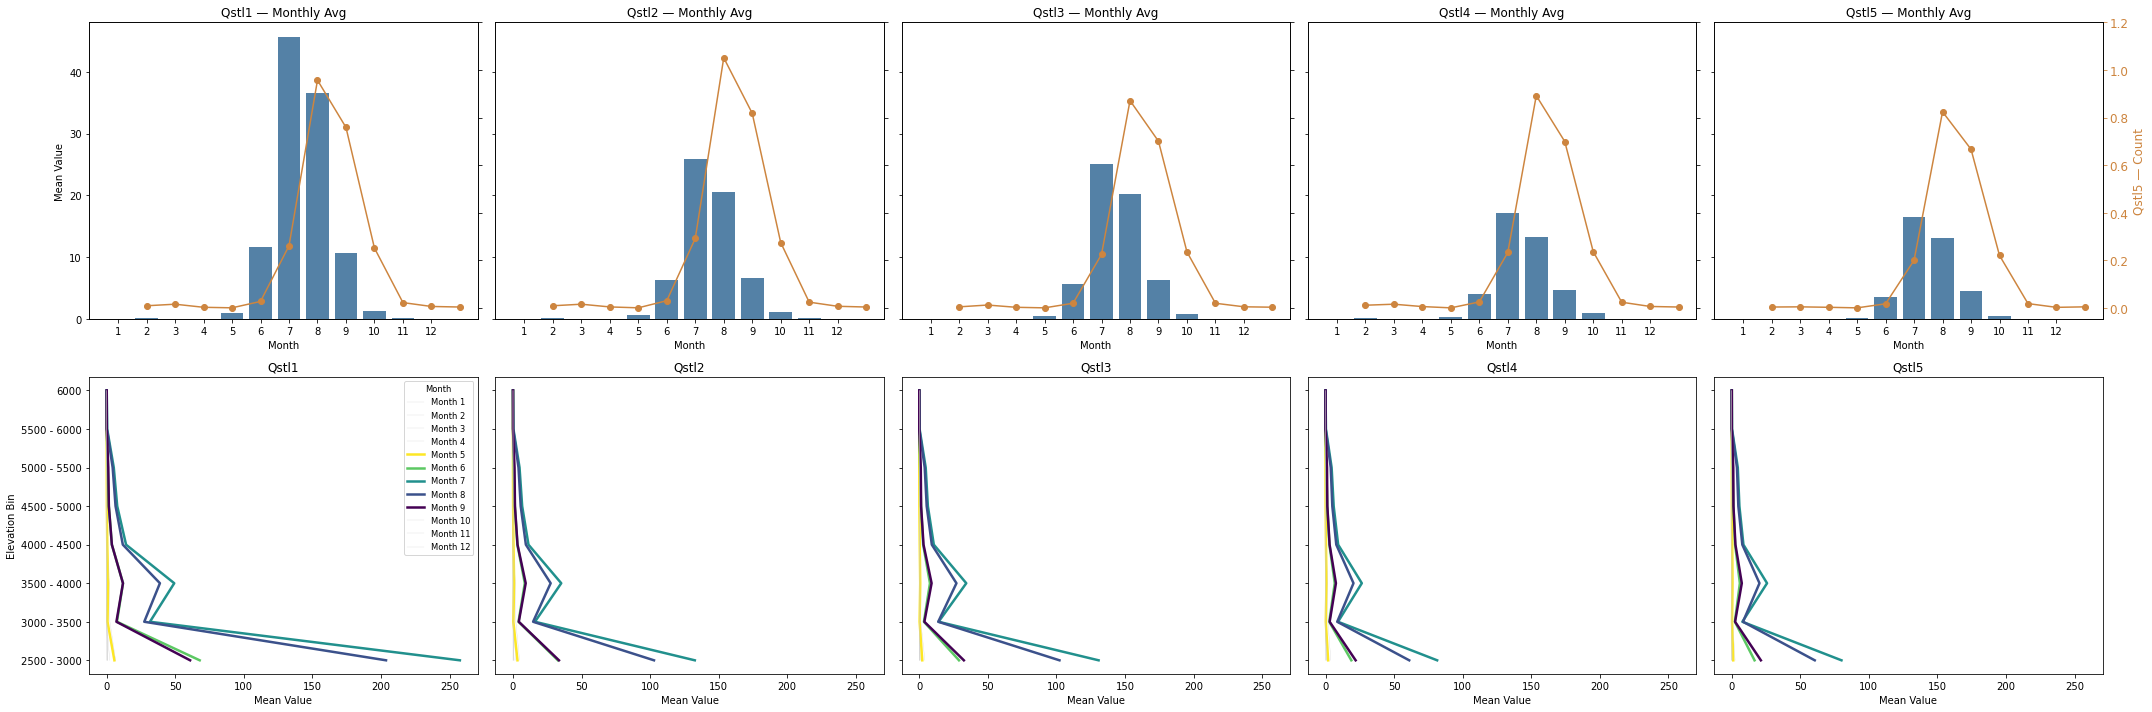

In [9]:

# FOR ELEVATION: Melt the combined_df
mean_df = combined_dfm.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')


mean_df_count = combined_dfm_count.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')

# Unique values
variables = mean_df['variable'].unique()
months = sorted(mean_df['month'].unique())
num_vars = len(variables)
# count
variables_count = mean_df_count['variable'].unique()


# Define which months to highlight (colorbar stretched over these)
highlight_months = [5, 6, 7, 8, 9]
cmap = cm.get_cmap('viridis_r', len(highlight_months))

# Assign colors: vivid for 5–9, light gray for others
colors = {}
for month in months:
    if month in highlight_months:
        idx = highlight_months.index(month)
        colors[month] = cmap(idx)
    else:
        colors[month] = (0.8, 0.8, 0.8, 0.9)  # light gray with transparency



# ---------------- PLOT ----------------

fig = plt.figure(figsize=(6*num_vars, 10))

bar_axes = []
bar_sec_axes = []
line_axes = []

for i in range(num_vars):
    # Bar plot axes (top row), share y-axis
    sharey_bar = bar_axes[0] if i > 0 else None
    ax_bar = fig.add_subplot(2, num_vars, i + 1, sharey=sharey_bar)
    bar_axes.append(ax_bar)
    
    # Add secondary y-axis
    ax_bar_sec = ax_bar.twinx()
    bar_sec_axes.append(ax_bar_sec)

    # Line plot axes (bottom row), share x-axis
    sharex_line = line_axes[0] if i > 0 else None
    ax_line = fig.add_subplot(2, num_vars, num_vars + i + 1, sharex=sharex_line)
    line_axes.append(ax_line)

# --- Top row: bar plots ---
for i, var in enumerate(variables):
    ax = bar_axes[i]
    ax_sec = bar_sec_axes[i]
    
    df_var = mean_df[mean_df['variable'] == var]
    df_monthly = df_var.groupby('month')['value'].mean().reset_index()

    sns.barplot(
        data=df_monthly,
        x='month',
        y='value',
        color='steelblue',
        ax=ax
    )

    ax.set_title(f'{var} — Monthly Avg')
    ax.set_xlabel('Month')
    if i == 0:
        ax.set_ylabel('Mean Value')
    else:
        ax.set_ylabel('')

        ax.tick_params(labelleft=False)






# ---------- ADD DF COUNT HERE ------------
    df_var_count = mean_df_count[mean_df_count['variable'] == var]
    # df_monthly_count = df_var_count.groupby('month')['value'].mean().reset_index()
    df_monthly_count = (df_var_count.groupby('month')['value']
                        .mean()
                        .reset_index()
                        .sort_values('month')  # ensure correct order
                       )
    
    # ax_sec.plot(df_monthly_count['month'], df_monthly_count, color='red', marker='o')
    ax_sec.plot(df_monthly_count['month'], df_monthly_count['value'], color='peru', marker='o')

    # ax_sec.tick_params(axis='y', colors='peru', labelsize=12)
    # ax_sec.set_ylabel(f'{var} — Count', color='peru', fontsize=12)
    if i == num_vars - 1:
        ax_sec.set_ylabel(f'{var} — Count', color='peru', fontsize=12)
        ax_sec.tick_params(axis='y', colors='peru', labelsize=12, labelright=True)
    else:
        ax_sec.set_ylabel('')
        ax_sec.tick_params(axis='y', labelleft=False, labelright=False)



    # Get global y-limits from all secondary axes
    sec_ymins = [ax.get_ylim()[0] for ax in bar_sec_axes]
    sec_ymaxs = [ax.get_ylim()[1] for ax in bar_sec_axes]

    global_ymin = min(sec_ymins)
    global_ymax = max(sec_ymaxs)

    # Apply shared limits to all secondary axes
    for ax in bar_sec_axes:
        ax.set_ylim(global_ymin, 1.2)




# --- Bottom row: line plots ---
for i, var in enumerate(variables):
    ax = line_axes[i]
    df_var = mean_df[mean_df['variable'] == var]

    for j, month in enumerate(months):
        df_month = df_var[df_var['month'] == month]
        lw = 2.5 if month in [5, 6, 7, 8, 9] else 0.3

        ax.plot(
            df_month['value'],
            df_month['elevation_bin'],
            label=f'Month {month}',
            color=colors[month],
            linewidth=lw
        )

    ax.set_title(f'{var}')
    ax.set_xlabel('Mean Value')
    # ax.grid(True)
    if i == 0:
        ax.set_ylabel('Elevation Bin')
    else:
        ax.set_ylabel('')
        ax.tick_params(labelleft=False)


# Legend for line plots
line_axes[0].legend(
    title='Month',
    loc='upper right',
    frameon=True,
    fontsize='small',
    title_fontsize='small'
)



plt.tight_layout()



# plt.savefig('/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/output/testplots/mustang_elevation_TL_sediments.png', dpi = 300, bbox_inches = 'tight')



<AxesSubplot:>

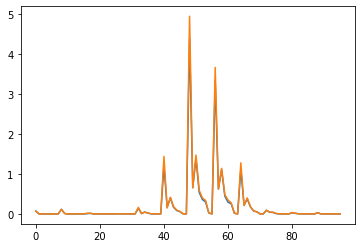

In [10]:
combined_dfm_count.Qstl1.plot()
combined_dfm_count.Qstl2.plot()

In [11]:
df_var_count = mean_df_count[mean_df_count['variable'] == var]
df_monthly_count = df_var_count.groupby('month')['value'].mean().reset_index()
    

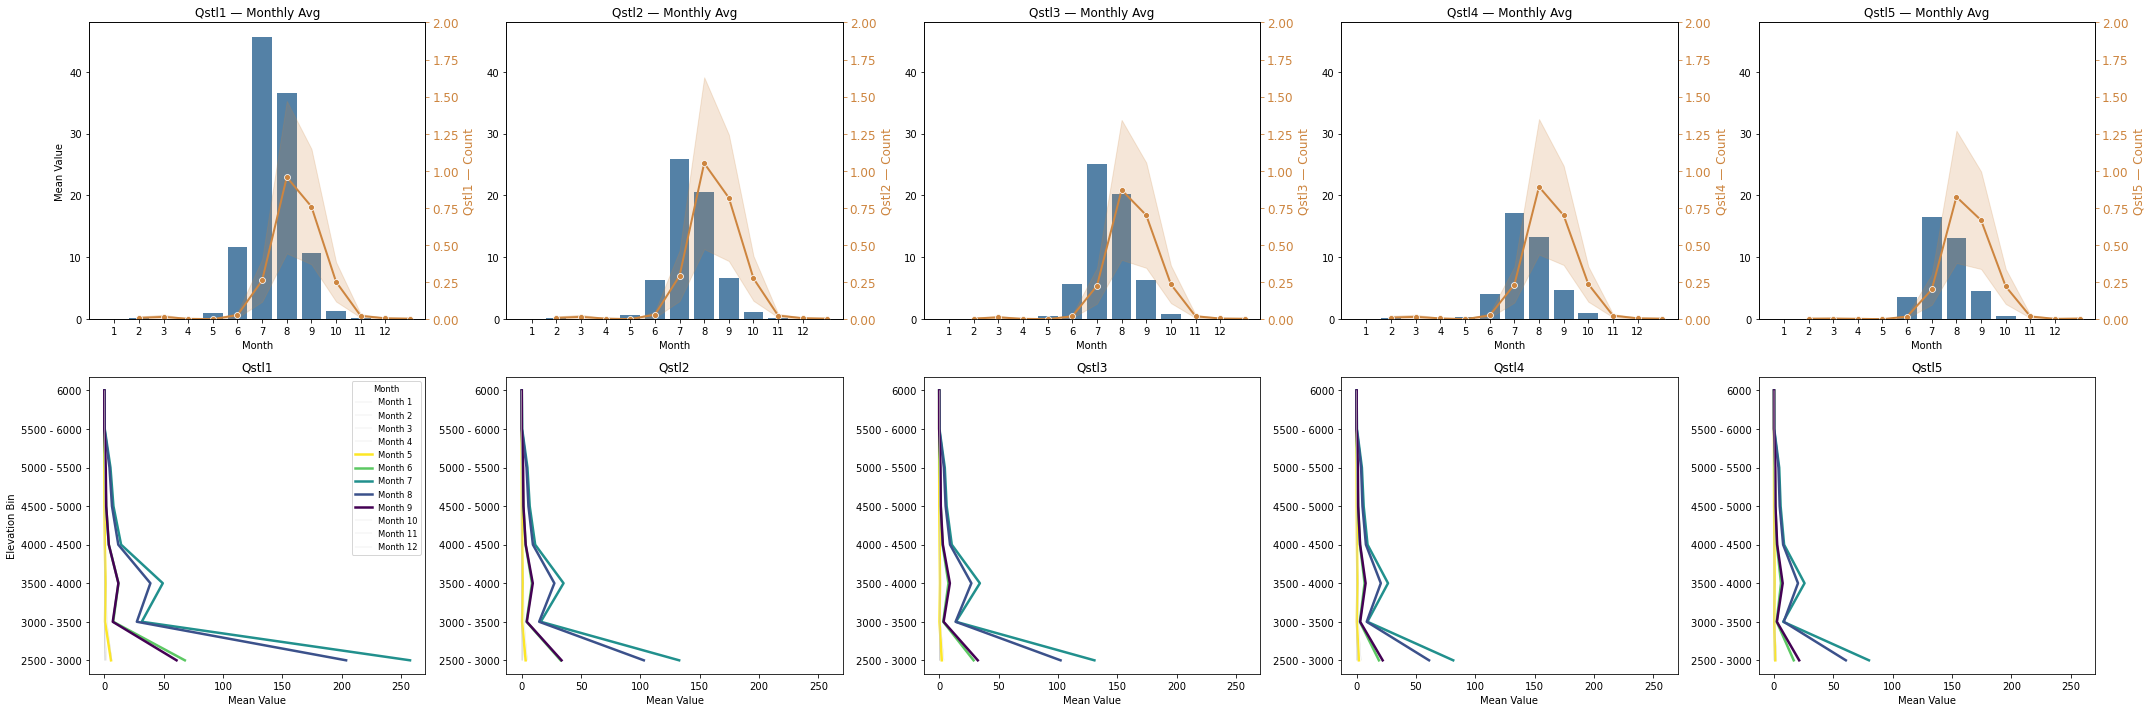

In [12]:

# FOR ELEVATION: Melt the combined_df
mean_df = combined_dfm.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')


mean_df_count = combined_dfm_count.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')

# Unique values
variables = mean_df['variable'].unique()
months = sorted(mean_df['month'].unique())
num_vars = len(variables)
# count
variables_count = mean_df_count['variable'].unique()


# Define which months to highlight (colorbar stretched over these)
highlight_months = [5, 6, 7, 8, 9]
cmap = cm.get_cmap('viridis_r', len(highlight_months))

# Assign colors: vivid for 5–9, light gray for others
colors = {}
for month in months:
    if month in highlight_months:
        idx = highlight_months.index(month)
        colors[month] = cmap(idx)
    else:
        colors[month] = (0.8, 0.8, 0.8, 0.9)  # light gray with transparency



# ---------------- PLOT ----------------

fig = plt.figure(figsize=(6*num_vars, 10))

bar_axes = []
bar_sec_axes = []
line_axes = []

for i in range(num_vars):
    # Bar plot axes (top row), share y-axis
    sharey_bar = bar_axes[0] if i > 0 else None
    ax_bar = fig.add_subplot(2, num_vars, i + 1, sharey=sharey_bar)
    bar_axes.append(ax_bar)
    
    # Add secondary y-axis
    ax_bar_sec = ax_bar.twinx()
    bar_sec_axes.append(ax_bar_sec)

    # Line plot axes (bottom row), share x-axis
    sharex_line = line_axes[0] if i > 0 else None
    ax_line = fig.add_subplot(2, num_vars, num_vars + i + 1, sharex=sharex_line)
    line_axes.append(ax_line)

# --- Top row: bar plots ---
for i, var in enumerate(variables):
    ax = bar_axes[i]
    ax_sec = bar_sec_axes[i]
    
    df_var = mean_df[mean_df['variable'] == var]
    df_monthly = df_var.groupby('month')['value'].mean().reset_index()
    
    sns.barplot(
        data=df_monthly,
        x='month',
        y='value',
        color='steelblue',
        ax=ax
    )
    
    ax.set_title(f'{var} — Monthly Avg')
    ax.set_xlabel('Month')
    if i == 0:
        ax.set_ylabel('Mean Value')
    else:
        ax.set_ylabel('')
    
    # --- Here is the seaborn lineplot with error bars on the secondary y-axis ---
    df_var_count = mean_df_count[mean_df_count['variable'] == var]
    
    sns.lineplot(
        data=df_var_count,
        x='month',
        y='value',
        ax=ax_sec,
        color='peru',
        marker='o',
        errorbar='se',  # seaborn automatically computes envelope (std dev)
        # errorbar = None,
        linestyle='-',
        linewidth=2
    )
    
    ax_sec.tick_params(axis='y', colors='peru', labelsize=12)
    ax_sec.set_ylabel(f'{var} — Count', color='peru', fontsize=12)
    
    ax_sec.set_ylim(0, 2)


'''

# ---------- ADD DF COUNT HERE ------------
    df_var_count = mean_df_count[mean_df_count['variable'] == var]
    # df_monthly_count = df_var_count.groupby('month')['value'].mean().reset_index()
    df_monthly_count = (df_var_count.groupby('month')['value']
                        .mean()
                        .reset_index()
                        .sort_values('month')  # ensure correct order
                       )
    
    # ax_sec.plot(df_monthly_count['month'], df_monthly_count, color='red', marker='o')
    ax_sec.plot(df_monthly_count['month'], df_monthly_count['value'], color='peru', marker='o')

    # ax_sec.set_ylabel('Cumulative Sum', color='red')
    ax_sec.tick_params(axis='y', colors='peru', labelsize=12)
    ax_sec.set_ylabel(f'{var} — Count', color='peru', fontsize=12)


    # Get global y-limits from all secondary axes
    sec_ymins = [ax.get_ylim()[0] for ax in bar_sec_axes]
    sec_ymaxs = [ax.get_ylim()[1] for ax in bar_sec_axes]

    global_ymin = min(sec_ymins)
    global_ymax = max(sec_ymaxs)

    # Apply shared limits to all secondary axes
    for ax in bar_sec_axes:
        ax.set_ylim(global_ymin, 1.2)
'''




# --- Bottom row: line plots ---
for i, var in enumerate(variables):
    ax = line_axes[i]
    df_var = mean_df[mean_df['variable'] == var]

    for j, month in enumerate(months):
        df_month = df_var[df_var['month'] == month]
        lw = 2.5 if month in [5, 6, 7, 8, 9] else 0.3

        ax.plot(
            df_month['value'],
            df_month['elevation_bin'],
            label=f'Month {month}',
            color=colors[month],
            linewidth=lw
        )

    ax.set_title(f'{var}')
    ax.set_xlabel('Mean Value')
    # ax.grid(True)
    if i == 0:
        ax.set_ylabel('Elevation Bin')
    else:
        ax.set_ylabel('')

# Legend for line plots
line_axes[0].legend(
    title='Month',
    loc='upper right',
    frameon=True,
    fontsize='small',
    title_fontsize='small'
)

plt.tight_layout()
plt.show()

# Qstl change per land cover

In [13]:
# LANGTANG 

In [14]:
combined_df

# Assuming your DataFrame is called df
qstl_columns = ['Qstl2', 'Qstl3', 'Qstl4', 'Qstl5']

# Create new columns with % of Qstl1
for col in qstl_columns:
    combined_df[f'{col}_pct_of_Qstl1'] = (combined_df[col] / combined_df['Qstl1']) * 100

grouped = combined_df.groupby(['month', 'elevation_bin']).mean().reset_index()
    

/var/folders/31/xdyntby945q7564txk4rqyh40000gp/T/ipykernel_13520/909239311.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


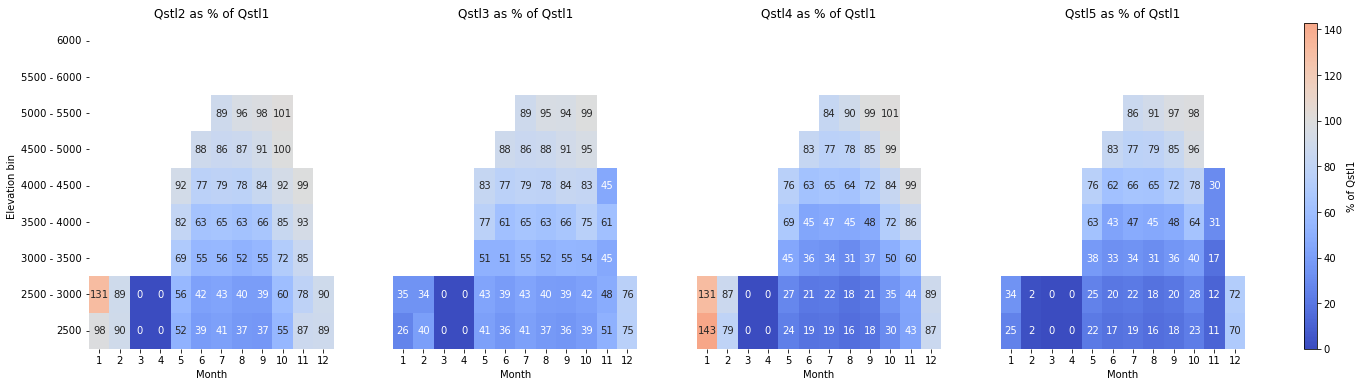

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Your relative columns
qstl_pct_cols = [f'{col}_pct_of_Qstl1' for col in ['Qstl2', 'Qstl3', 'Qstl4', 'Qstl5']]

# Create figure and GridSpec
fig = plt.figure(figsize=(22, 6))
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 0.05], wspace=0.3)

# Color range
vmin = 0
vmax = max(grouped[qstl_pct_cols].max())  # Or set to 200, etc.

# Track the QuadMesh for colorbar
quadmesh = None

# Plot heatmaps in first 4 gridspec slots
for i, col in enumerate(qstl_pct_cols):
    ax = fig.add_subplot(gs[i])
    data = grouped.pivot(index='elevation_bin', columns='month', values=col)
    data = data.sort_index(ascending=False)

    hm = sns.heatmap(
        data,
        annot=True,
        cmap='coolwarm',
        center=100,
        ax=ax,
        cbar=False,
        fmt='.0f',
        vmin=vmin,
        vmax=vmax
    )

    if quadmesh is None:
        quadmesh = hm.collections[0]

    ax.set_title(col.replace('_pct_of_Qstl1', ' as % of Qstl1'))
    ax.set_xlabel('Month')

    if i == 0:
        ax.set_ylabel('Elevation bin')
    else:
        ax.set_ylabel('')
        ax.set_yticklabels([])
        ax.set_yticks([])

# Colorbar in the last GridSpec slot
cbar_ax = fig.add_subplot(gs[4])
fig.colorbar(quadmesh, cax=cbar_ax, label='% of Qstl1')

plt.tight_layout()
plt.show()



# MUSTANG 

In [16]:

# Assuming your DataFrame is called df
qstl_columns = ['Qstl2', 'Qstl3', 'Qstl4', 'Qstl5']

# Create new columns with % of Qstl1
for col in qstl_columns:
    combined_dfm[f'{col}_pct_of_Qstl1'] = (combined_dfm[col] / combined_dfm['Qstl1']) * 100

groupedm = combined_dfm.groupby(['month', 'elevation_bin']).mean().reset_index()


/var/folders/31/xdyntby945q7564txk4rqyh40000gp/T/ipykernel_13520/1186268456.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


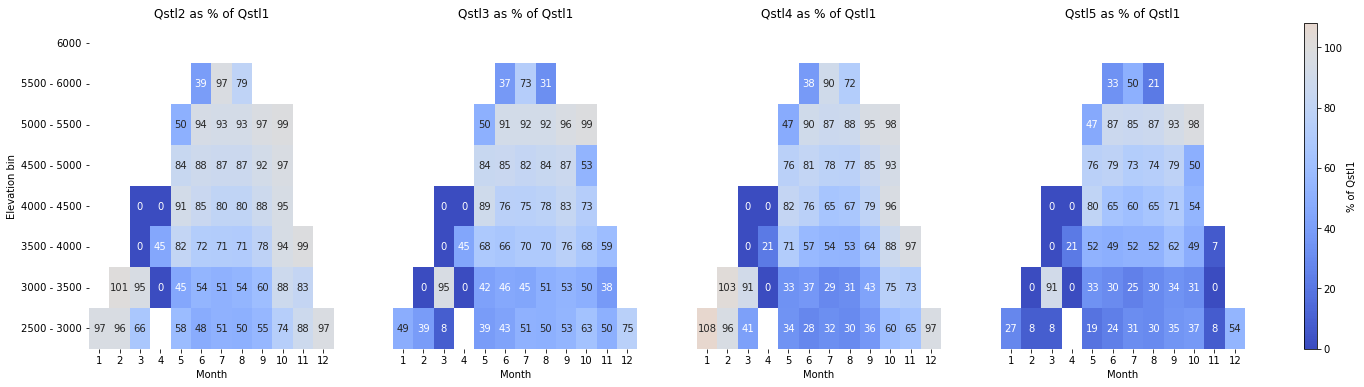

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Your relative columns
qstl_pct_cols = [f'{col}_pct_of_Qstl1' for col in ['Qstl2', 'Qstl3', 'Qstl4', 'Qstl5']]

# Create figure and GridSpec
fig = plt.figure(figsize=(22, 6))
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 0.05], wspace=0.3)

# Color range
vmin = 0
vmax = max(groupedm[qstl_pct_cols].max())  # Or set to 200, etc.

# Track the QuadMesh for colorbar
quadmesh = None


# Plot heatmaps in first 4 gridspec slots
for i, col in enumerate(qstl_pct_cols):
    ax = fig.add_subplot(gs[i])
    data = groupedm.pivot(index='elevation_bin', columns='month', values=col)
    data = data.sort_index(ascending=False)

    hm = sns.heatmap(
        data,
        annot=True,
        cmap='coolwarm',
        center=100,
        ax=ax,
        cbar=False,
        fmt='.0f',
        vmin=vmin,
        vmax=vmax
    )

    if quadmesh is None:
        quadmesh = hm.collections[0]

    ax.set_title(col.replace('_pct_of_Qstl1', ' as % of Qstl1'))
    ax.set_xlabel('Month')

    if i == 0:
        ax.set_ylabel('Elevation bin')
    else:
        ax.set_ylabel('')
        ax.set_yticklabels([])
        ax.set_yticks([])

# Colorbar in the last GridSpec slot
cbar_ax = fig.add_subplot(gs[4])
fig.colorbar(quadmesh, cax=cbar_ax, label='% of Qstl1')

plt.tight_layout()
plt.show()
